# **Laptop Price Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:Datasets/laptopData.csv")

In [3]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [5]:
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [6]:
df.dropna(how='all', inplace=True)

In [7]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Preprocessing

Company	Encode (categorical)	

TypeName	Encode (categorical)	

Inches	Convert to float	

ScreenResolution	Extract features (Touch, IPS, PPI)	

Cpu	Extract CPU brand/type	

Ram	Convert to int (in GB)	

Memory	Extract SSD/HDD/Hybrid values	

Gpu	Extract GPU brand	

OpSys	Encode	

Weight	Convert to float	

In [8]:
df['Company'] = df['Company'].str.strip()
company_dummies = pd.get_dummies(df['Company'], prefix = 'Brand', drop_first = True)
df = pd.concat([df.drop('Company', axis = 1), company_dummies], axis = 1)

In [9]:
df

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,Brand_LG,Brand_Lenovo,Brand_MSI,Brand_Mediacom,Brand_Microsoft,Brand_Razer,Brand_Samsung,Brand_Toshiba,Brand_Vero,Brand_Xiaomi
0,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,...,False,False,False,False,False,False,False,False,False,False
1,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,...,False,False,False,False,False,False,False,False,False,False
2,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,...,False,False,False,False,False,False,False,False,False,False
3,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,...,False,False,False,False,False,False,False,False,False,False
4,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,...,False,True,False,False,False,False,False,False,False,False
1299,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,...,False,True,False,False,False,False,False,False,False,False
1300,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,...,False,True,False,False,False,False,False,False,False,False
1301,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df['TypeName'].value_counts()

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

In [11]:
df = pd.get_dummies(df, columns = ['TypeName'], drop_first = False)

In [12]:
df

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Brand_Apple,...,Brand_Samsung,Brand_Toshiba,Brand_Vero,Brand_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,True,...,False,False,False,False,False,False,False,False,True,False
1,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,True,...,False,False,False,False,False,False,False,False,True,False
2,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,...,False,False,False,False,False,False,False,True,False,False
3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,True,...,False,False,False,False,False,False,False,False,True,False
4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,False,...,False,False,False,False,True,False,False,False,False,False
1299,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,False,...,False,False,False,False,True,False,False,False,False,False
1300,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,...,False,False,False,False,False,False,False,True,False,False
1301,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
df['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [14]:
df['Inches'].replace('?', np.nan, inplace=True)

In [15]:
df['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', nan, '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [16]:
df['Inches'] = df['Inches'].astype(float)

In [17]:
df['Inches'].isna().sum()

1

In [18]:
df['Inches'].median()

15.6

In [19]:
df.fillna({'Inches' : df['Inches'].median()}, inplace = True)

In [20]:
df['Inches'].isna().sum()

0

In [21]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

In [22]:
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)$') ## regular expression

In [23]:
df[['ScreenWidth', 'ScreenHeight']] = df['Resolution'].str.split('x', expand = True).astype(float)

In [24]:
df

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Brand_Apple,...,Brand_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Resolution,ScreenWidth,ScreenHeight
0,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,True,...,False,False,False,False,False,True,False,2560x1600,2560.0,1600.0
1,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,True,...,False,False,False,False,False,True,False,1440x900,1440.0,900.0
2,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,...,False,False,False,False,True,False,False,1920x1080,1920.0,1080.0
3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,True,...,False,False,False,False,False,True,False,2880x1800,2880.0,1800.0
4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,True,...,False,False,False,False,False,True,False,2560x1600,2560.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,False,...,False,True,False,False,False,False,False,1920x1080,1920.0,1080.0
1299,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,False,...,False,True,False,False,False,False,False,3200x1800,3200.0,1800.0
1300,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,...,False,False,False,False,True,False,False,1366x768,1366.0,768.0
1301,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,...,False,False,False,False,True,False,False,1366x768,1366.0,768.0


In [25]:
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen', case = False)
df['IPS'] = df['ScreenResolution'].str.contains('IPS Panel', case = False)
df['Retina'] = df['ScreenResolution'].str.contains('Retina', case = False)
df['4K'] = df['ScreenResolution'].str.contains('3840x2160')

In [26]:
df.drop(columns = 'ScreenResolution', inplace = True)

In [27]:
df

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Brand_Apple,Brand_Asus,...,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Resolution,ScreenWidth,ScreenHeight,Touchscreen,IPS,Retina,4K
0,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,True,False,...,False,True,False,2560x1600,2560.0,1600.0,False,True,True,False
1,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,True,False,...,False,True,False,1440x900,1440.0,900.0,False,False,False,False
2,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,...,True,False,False,1920x1080,1920.0,1080.0,False,False,False,False
3,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,True,False,...,False,True,False,2880x1800,2880.0,1800.0,False,True,True,False
4,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,True,False,...,False,True,False,2560x1600,2560.0,1600.0,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,False,False,...,False,False,False,1920x1080,1920.0,1080.0,True,True,False,False
1299,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,False,False,...,False,False,False,3200x1800,3200.0,1800.0,True,True,False,False
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,False,...,True,False,False,1366x768,1366.0,768.0,False,False,False,False
1301,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,False,...,True,False,False,1366x768,1366.0,768.0,False,False,False,False


In [28]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', '

In [29]:
df['CpuBrand'] = df['Cpu'].apply(
    lambda x: 'Intel Core i7' if 'Intel Core i7' in x else
              'Intel Core i5' if 'Intel Core i5' in x else
              'Intel Core i3' if 'Intel Core i3' in x else
              'Intel Core M' if 'Intel Core M' in x else
              'Intel Celeron' if 'Intel Celeron' in x else
              'Intel Pentium' if 'Intel Pentium' in x else
              'Intel Atom' if 'Intel Atom' in x else
              'Intel Xeon' if 'Intel Xeon' in x else
              'AMD Ryzen' if 'AMD Ryzen' in x else
              'AMD A-Series' if 'AMD A' in x else
              'AMD FX' if 'AMD FX' in x else
              'AMD E-Series' if 'AMD E' in x else
              'Samsung Cortex' if 'Samsung Cortex' in x else
              ''
)

In [30]:
df['CpuBrand'].value_counts()

CpuBrand
Intel Core i7     515
Intel Core i5     410
Intel Core i3     134
Intel Celeron      87
AMD A-Series       47
Intel Pentium      30
Intel Core M       19
Intel Atom         11
AMD E-Series        9
AMD Ryzen           4
Intel Xeon          4
AMD FX              2
Samsung Cortex      1
Name: count, dtype: int64

In [31]:
df

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Brand_Apple,Brand_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Resolution,ScreenWidth,ScreenHeight,Touchscreen,IPS,Retina,4K,CpuBrand
0,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,True,False,...,True,False,2560x1600,2560.0,1600.0,False,True,True,False,Intel Core i5
1,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,True,False,...,True,False,1440x900,1440.0,900.0,False,False,False,False,Intel Core i5
2,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,...,False,False,1920x1080,1920.0,1080.0,False,False,False,False,Intel Core i5
3,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,True,False,...,True,False,2880x1800,2880.0,1800.0,False,True,True,False,Intel Core i7
4,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,True,False,...,True,False,2560x1600,2560.0,1600.0,False,True,True,False,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,False,False,...,False,False,1920x1080,1920.0,1080.0,True,True,False,False,Intel Core i7
1299,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,False,False,...,False,False,3200x1800,3200.0,1800.0,True,True,False,False,Intel Core i7
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,False,...,False,False,1366x768,1366.0,768.0,False,False,False,False,Intel Celeron
1301,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,False,...,False,False,1366x768,1366.0,768.0,False,False,False,False,Intel Core i7


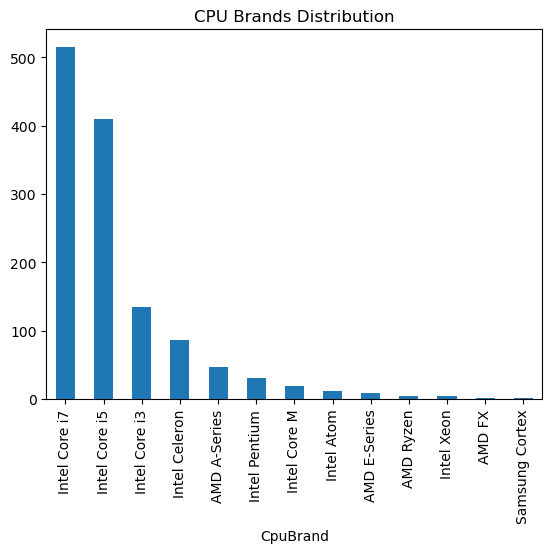

In [32]:
df['CpuBrand'].value_counts().plot(kind = 'bar')
plt.title('CPU Brands Distribution')
plt.show()

re stands for regular expressions, It lets you search, match, and extract patterns from strings.

In [33]:
import re

def extract_cpu_series(cpu):
    match = re.search(r'\b\d{4}[A-Z]{1,2}\b', cpu)    # to find the modelnumber from the cpu column e.g., 7700HQ
    if match:
        return match.group()[4:]
    return 'Unknown'

df['CpuSeries'] = df['Cpu'].apply(extract_cpu_series)

In [34]:
def extract_clock_speed(cpu):
    match = re.search(r'(\d+\.\d+)GHz', cpu)
    if match:
        return float(match.group(1))
    return None

df['ClockSpeedGHz'] = df['Cpu'].apply(extract_clock_speed)

In [35]:
def extract_core_generation(cpu):
    match = re.search(r'\b(1[0-3]|[6-9])\d{3}\b', cpu)  # finds 6th - 13th generations
    if match:
        return int(str(match.group())[0]) #7200 -> 7
    return None

df['CpuGen'] = df['Cpu'].apply(extract_core_generation)

In [36]:
df

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Brand_Apple,Brand_Asus,...,ScreenWidth,ScreenHeight,Touchscreen,IPS,Retina,4K,CpuBrand,CpuSeries,ClockSpeedGHz,CpuGen
0,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,True,False,...,2560.0,1600.0,False,True,True,False,Intel Core i5,Unknown,2.3,NaN
1,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,True,False,...,1440.0,900.0,False,False,False,False,Intel Core i5,Unknown,1.8,NaN
2,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,...,1920.0,1080.0,False,False,False,False,Intel Core i5,U,2.5,NaN
3,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,True,False,...,2880.0,1800.0,False,True,True,False,Intel Core i7,Unknown,2.7,NaN
4,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,True,False,...,2560.0,1600.0,False,True,True,False,Intel Core i5,Unknown,3.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,False,False,...,1920.0,1080.0,True,True,False,False,Intel Core i7,U,2.5,NaN
1299,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,False,False,...,3200.0,1800.0,True,True,False,False,Intel Core i7,U,2.5,NaN
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,False,...,1366.0,768.0,False,False,False,False,Intel Celeron,Unknown,1.6,NaN
1301,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,False,...,1366.0,768.0,False,False,False,False,Intel Core i7,U,2.5,NaN


In [37]:
df['CpuGen'].value_counts()

CpuGen
9.0    29
7.0     8
6.0     2
Name: count, dtype: int64

In [38]:
df['CpuSeries'].value_counts()

CpuSeries
U          779
HQ         245
Unknown    211
HK          17
P           16
M            4
Y            1
Name: count, dtype: int64

In [39]:
df = pd.get_dummies(df, columns = ['CpuSeries'], drop_first = False)

In [40]:
df

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Brand_Apple,Brand_Asus,...,CpuBrand,ClockSpeedGHz,CpuGen,CpuSeries_HK,CpuSeries_HQ,CpuSeries_M,CpuSeries_P,CpuSeries_U,CpuSeries_Unknown,CpuSeries_Y
0,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,True,False,...,Intel Core i5,2.3,NaN,False,False,False,False,False,True,False
1,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,True,False,...,Intel Core i5,1.8,NaN,False,False,False,False,False,True,False
2,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,...,Intel Core i5,2.5,NaN,False,False,False,False,True,False,False
3,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,True,False,...,Intel Core i7,2.7,NaN,False,False,False,False,False,True,False
4,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,True,False,...,Intel Core i5,3.1,NaN,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,False,False,...,Intel Core i7,2.5,NaN,False,False,False,False,True,False,False
1299,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,False,False,...,Intel Core i7,2.5,NaN,False,False,False,False,True,False,False
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,False,...,Intel Celeron,1.6,NaN,False,False,False,False,False,True,False
1301,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,False,...,Intel Core i7,2.5,NaN,False,False,False,False,True,False,False


In [41]:
df.drop(columns = ['CpuSeries_Unknown'], axis = 1, inplace = True)

In [42]:
df

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Brand_Apple,Brand_Asus,...,4K,CpuBrand,ClockSpeedGHz,CpuGen,CpuSeries_HK,CpuSeries_HQ,CpuSeries_M,CpuSeries_P,CpuSeries_U,CpuSeries_Y
0,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,True,False,...,False,Intel Core i5,2.3,NaN,False,False,False,False,False,False
1,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,True,False,...,False,Intel Core i5,1.8,NaN,False,False,False,False,False,False
2,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,...,False,Intel Core i5,2.5,NaN,False,False,False,False,True,False
3,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,True,False,...,False,Intel Core i7,2.7,NaN,False,False,False,False,False,False
4,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,True,False,...,False,Intel Core i5,3.1,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,False,False,...,False,Intel Core i7,2.5,NaN,False,False,False,False,True,False
1299,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,False,False,...,False,Intel Core i7,2.5,NaN,False,False,False,False,True,False
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,False,...,False,Intel Celeron,1.6,NaN,False,False,False,False,False,False
1301,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,False,...,False,Intel Core i7,2.5,NaN,False,False,False,False,True,False


In [43]:
df['RAM(GB)'] = df['Ram'].str.replace('GB', '', regex = False).astype(int)

In [44]:
df

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Brand_Apple,Brand_Asus,...,CpuBrand,ClockSpeedGHz,CpuGen,CpuSeries_HK,CpuSeries_HQ,CpuSeries_M,CpuSeries_P,CpuSeries_U,CpuSeries_Y,RAM(GB)
0,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,True,False,...,Intel Core i5,2.3,NaN,False,False,False,False,False,False,8
1,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,True,False,...,Intel Core i5,1.8,NaN,False,False,False,False,False,False,8
2,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,...,Intel Core i5,2.5,NaN,False,False,False,False,True,False,8
3,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,True,False,...,Intel Core i7,2.7,NaN,False,False,False,False,False,False,16
4,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,True,False,...,Intel Core i5,3.1,NaN,False,False,False,False,False,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,False,False,...,Intel Core i7,2.5,NaN,False,False,False,False,True,False,4
1299,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,False,False,...,Intel Core i7,2.5,NaN,False,False,False,False,True,False,16
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,False,...,Intel Celeron,1.6,NaN,False,False,False,False,False,False,2
1301,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,False,...,Intel Core i7,2.5,NaN,False,False,False,False,True,False,6


In [45]:
df.drop(columns = ['Ram'], axis = 1, inplace = True)

In [46]:
df

,Inches,Cpu,Memory,Gpu,OpSys,Weight,Price,Brand_Apple,Brand_Asus,Brand_Chuwi,...,CpuBrand,ClockSpeedGHz,CpuGen,CpuSeries_HK,CpuSeries_HQ,CpuSeries_M,CpuSeries_P,CpuSeries_U,CpuSeries_Y,RAM(GB)
0,13.3,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,True,False,False,...,Intel Core i5,2.3,NaN,False,False,False,False,False,False,8
1,13.3,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,True,False,False,...,Intel Core i5,1.8,NaN,False,False,False,False,False,False,8
2,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,...,Intel Core i5,2.5,NaN,False,False,False,False,True,False,8
3,15.4,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,True,False,False,...,Intel Core i7,2.7,NaN,False,False,False,False,False,False,16
4,13.3,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,True,False,False,...,Intel Core i5,3.1,NaN,False,False,False,False,False,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,False,False,False,...,Intel Core i7,2.5,NaN,False,False,False,False,True,False,4
1299,13.3,Intel Core i7 6500U 2.5GHz,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,False,False,False,...,Intel Core i7,2.5,NaN,False,False,False,False,True,False,16
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,False,False,...,Intel Celeron,1.6,NaN,False,False,False,False,False,False,2
1301,15.6,Intel Core i7 6500U 2.5GHz,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,False,False,...,Intel Core i7,2.5,NaN,False,False,False,False,True,False,6


In [47]:
df.drop(columns = ['Cpu'], axis = 1, inplace = True)

In [48]:
df

,Inches,Memory,Gpu,OpSys,Weight,Price,Brand_Apple,Brand_Asus,Brand_Chuwi,Brand_Dell,...,CpuBrand,ClockSpeedGHz,CpuGen,CpuSeries_HK,CpuSeries_HQ,CpuSeries_M,CpuSeries_P,CpuSeries_U,CpuSeries_Y,RAM(GB)
0,13.3,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,True,False,False,False,...,Intel Core i5,2.3,NaN,False,False,False,False,False,False,8
1,13.3,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,True,False,False,False,...,Intel Core i5,1.8,NaN,False,False,False,False,False,False,8
2,15.6,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,False,...,Intel Core i5,2.5,NaN,False,False,False,False,True,False,8
3,15.4,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,True,False,False,False,...,Intel Core i7,2.7,NaN,False,False,False,False,False,False,16
4,13.3,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,True,False,False,False,...,Intel Core i5,3.1,NaN,False,False,False,False,False,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,False,False,False,False,...,Intel Core i7,2.5,NaN,False,False,False,False,True,False,4
1299,13.3,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,False,False,False,False,...,Intel Core i7,2.5,NaN,False,False,False,False,True,False,16
1300,14.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,False,False,False,...,Intel Celeron,1.6,NaN,False,False,False,False,False,False,2
1301,15.6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,False,False,False,...,Intel Core i7,2.5,NaN,False,False,False,False,True,False,6


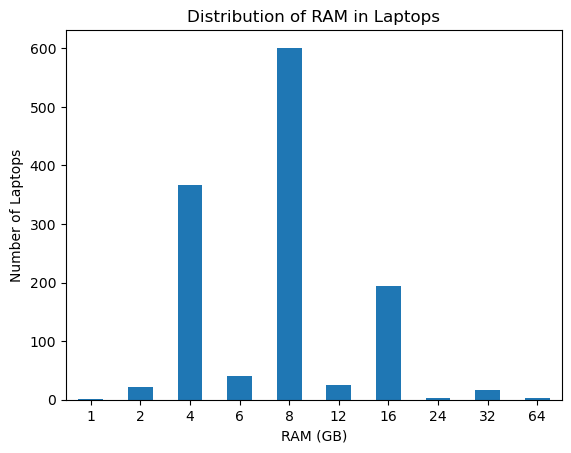

In [49]:
df['RAM(GB)'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('RAM (GB)')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=0)
plt.title('Distribution of RAM in Laptops')
plt.show()

In [50]:
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [51]:
df['Memory'] = df['Memory'].str.replace('1.0TB', '1000GB')
df['Memory'] = df['Memory'].str.replace('1TB', '1000GB')
df['Memory'] = df['Memory'].str.replace('2TB', '2000GB')

In [52]:
df['Memory'].value_counts()

Memory
256GB SSD                           401
1000GB HDD                          218
500GB HDD                           130
512GB SSD                           116
128GB SSD +  1000GB HDD              92
128GB SSD                            74
256GB SSD +  1000GB HDD              71
32GB Flash Storage                   37
2000GB HDD                           16
64GB Flash Storage                   14
512GB SSD +  1000GB HDD              14
1000GB SSD                           13
256GB SSD +  2000GB HDD              10
1000GB Hybrid                         9
256GB Flash Storage                   8
16GB Flash Storage                    7
32GB SSD                              6
128GB Flash Storage                   4
180GB SSD                             4
512GB SSD +  2000GB HDD               3
16GB SSD                              3
512GB Flash Storage                   2
1000GB SSD +  1000GB HDD              2
256GB SSD +  500GB HDD                2
128GB SSD +  2000GB HDD          

# df.iterrows()

used when we want to iterate row by row/record by record

# df.at[]

used when we want to work on specific values/cells
syntax: df.at[row index, 'column name'] = new value

In [53]:
df['HDD'] = 0
df['SSD'] = 0
df['Flash'] = 0
df['Hybrid'] = 0

for index, row in df.iterrows():
    memory = row['Memory']
    if not isinstance(memory, str):
        continue
    if 'HDD' in memory:
        df.at[index, 'HDD'] = sum([int(s.split('GB')[0]) for s in memory.split('+') if 'HDD' in s])
    if 'SSD' in memory:
        df.at[index, 'SSD'] = sum([int(s.split('GB')[0]) for s in memory.split('+') if 'SSD' in s])
    if 'Flash' in memory:
        df.at[index, 'Flash'] = sum([int(s.split('GB')[0]) for s in memory.split('+') if 'Flash' in s])
    if 'Hybrid' in memory:
        df.at[index, 'Hybrid'] = sum([int(s.split('GB')[0]) for s in memory.split('+') if 'Hybrid' in s])

In [54]:
df

,Inches,Memory,Gpu,OpSys,Weight,Price,Brand_Apple,Brand_Asus,Brand_Chuwi,Brand_Dell,...,CpuSeries_HQ,CpuSeries_M,CpuSeries_P,CpuSeries_U,CpuSeries_Y,RAM(GB),HDD,SSD,Flash,Hybrid
0,13.3,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,True,False,False,False,...,False,False,False,False,False,8,0,128,0,0
1,13.3,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,True,False,False,False,...,False,False,False,False,False,8,0,0,128,0
2,15.6,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,False,...,False,False,False,True,False,8,0,256,0,0
3,15.4,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,True,False,False,False,...,False,False,False,False,False,16,0,512,0,0
4,13.3,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,True,False,False,False,...,False,False,False,False,False,8,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,False,False,False,False,...,False,False,False,True,False,4,0,128,0,0
1299,13.3,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,False,False,False,False,...,False,False,False,True,False,16,0,512,0,0
1300,14.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,False,False,False,...,False,False,False,False,False,2,0,0,64,0
1301,15.6,1000GB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,False,False,False,...,False,False,False,True,False,6,1000,0,0,0


In [55]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [56]:
def categorize_gpu(gpu_name):
    gpu_name = gpu_name.lower()
    if "intel hd" in gpu_name or "uhd" in gpu_name:
        return "Intel HD"
    elif "gtx" in gpu_name:
        return "Nvidia GTX"
    elif "mx" in gpu_name:
        return "Nvidia MX"
    elif "rtx" in gpu_name:
        return "Nvidia RTX"
    elif "radeon" in gpu_name:
        return "AMD Radeon"
    else:
        return "Unknown"

df["GpuCategory"] = df["Gpu"].apply(categorize_gpu)

In [57]:
df['GpuCategory'].value_counts()

GpuCategory
Intel HD      688
Nvidia GTX    235
AMD Radeon    169
Nvidia MX     113
Unknown        68
Name: count, dtype: int64

In [58]:
df = pd.get_dummies(df, columns=['GpuCategory'], drop_first = False)

In [59]:
df

,Inches,Memory,Gpu,OpSys,Weight,Price,Brand_Apple,Brand_Asus,Brand_Chuwi,Brand_Dell,...,RAM(GB),HDD,SSD,Flash,Hybrid,GpuCategory_AMD Radeon,GpuCategory_Intel HD,GpuCategory_Nvidia GTX,GpuCategory_Nvidia MX,GpuCategory_Unknown
0,13.3,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,True,False,False,False,...,8,0,128,0,0,False,False,False,False,True
1,13.3,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,True,False,False,False,...,8,0,0,128,0,False,True,False,False,False
2,15.6,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,False,...,8,0,256,0,0,False,True,False,False,False
3,15.4,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,True,False,False,False,...,16,0,512,0,0,True,False,False,False,False
4,13.3,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,True,False,False,False,...,8,0,256,0,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,False,False,False,False,...,4,0,128,0,0,False,True,False,False,False
1299,13.3,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,False,False,False,False,...,16,0,512,0,0,False,True,False,False,False
1300,14.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,False,False,False,...,2,0,0,64,0,False,True,False,False,False
1301,15.6,1000GB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,False,False,False,...,6,1000,0,0,0,True,False,False,False,False


In [60]:
df.drop(columns = ['GpuCategory_Unknown', 'Memory', 'Gpu'], axis = 1, inplace = True)

In [61]:
df

,Inches,OpSys,Weight,Price,Brand_Apple,Brand_Asus,Brand_Chuwi,Brand_Dell,Brand_Fujitsu,Brand_Google,...,CpuSeries_Y,RAM(GB),HDD,SSD,Flash,Hybrid,GpuCategory_AMD Radeon,GpuCategory_Intel HD,GpuCategory_Nvidia GTX,GpuCategory_Nvidia MX
0,13.3,macOS,1.37kg,71378.6832,True,False,False,False,False,False,...,False,8,0,128,0,0,False,False,False,False
1,13.3,macOS,1.34kg,47895.5232,True,False,False,False,False,False,...,False,8,0,0,128,0,False,True,False,False
2,15.6,No OS,1.86kg,30636.0000,False,False,False,False,False,False,...,False,8,0,256,0,0,False,True,False,False
3,15.4,macOS,1.83kg,135195.3360,True,False,False,False,False,False,...,False,16,0,512,0,0,True,False,False,False
4,13.3,macOS,1.37kg,96095.8080,True,False,False,False,False,False,...,False,8,0,256,0,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Windows 10,1.8kg,33992.6400,False,False,False,False,False,False,...,False,4,0,128,0,0,False,True,False,False
1299,13.3,Windows 10,1.3kg,79866.7200,False,False,False,False,False,False,...,False,16,0,512,0,0,False,True,False,False
1300,14.0,Windows 10,1.5kg,12201.1200,False,False,False,False,False,False,...,False,2,0,0,64,0,False,True,False,False
1301,15.6,Windows 10,2.19kg,40705.9200,False,False,False,False,False,False,...,False,6,1000,0,0,0,True,False,False,False


In [62]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [63]:
def categorize_os(os):
    os = os.lower()
    if "windows" in os:
        return "Windows"
    elif "mac" in os:
        return "MacOS"
    elif "linux" in os:
        return "Linux"
    elif "chrome" in os:
        return "Chrome OS"
    elif "no os" in os or "dos" in os:
        return "No OS"
    elif "android" in os:
        return "Other"
    else:
        return "Other"

In [64]:
df['OpSys_Cat'] = df['OpSys'].apply(categorize_os)

In [65]:
df['OpSys_Cat'].value_counts()

OpSys_Cat
Windows      1100
No OS          63
Linux          61
Chrome OS      27
MacOS          21
Other           1
Name: count, dtype: int64

In [66]:
dummies = pd.get_dummies(df['OpSys_Cat'], drop_first=False)
dummies

,Chrome OS,Linux,MacOS,No OS,Other,Windows
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,False,True,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False
...,...,...,...,...,...,...
1298,False,False,False,False,False,True
1299,False,False,False,False,False,True
1300,False,False,False,False,False,True
1301,False,False,False,False,False,True


In [67]:
df = pd.concat([df, dummies], axis = 1)

In [68]:
df

,Inches,OpSys,Weight,Price,Brand_Apple,Brand_Asus,Brand_Chuwi,Brand_Dell,Brand_Fujitsu,Brand_Google,...,GpuCategory_Intel HD,GpuCategory_Nvidia GTX,GpuCategory_Nvidia MX,OpSys_Cat,Chrome OS,Linux,MacOS,No OS,Other,Windows
0,13.3,macOS,1.37kg,71378.6832,True,False,False,False,False,False,...,False,False,False,MacOS,False,False,True,False,False,False
1,13.3,macOS,1.34kg,47895.5232,True,False,False,False,False,False,...,True,False,False,MacOS,False,False,True,False,False,False
2,15.6,No OS,1.86kg,30636.0000,False,False,False,False,False,False,...,True,False,False,No OS,False,False,False,True,False,False
3,15.4,macOS,1.83kg,135195.3360,True,False,False,False,False,False,...,False,False,False,MacOS,False,False,True,False,False,False
4,13.3,macOS,1.37kg,96095.8080,True,False,False,False,False,False,...,False,False,False,MacOS,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Windows 10,1.8kg,33992.6400,False,False,False,False,False,False,...,True,False,False,Windows,False,False,False,False,False,True
1299,13.3,Windows 10,1.3kg,79866.7200,False,False,False,False,False,False,...,True,False,False,Windows,False,False,False,False,False,True
1300,14.0,Windows 10,1.5kg,12201.1200,False,False,False,False,False,False,...,True,False,False,Windows,False,False,False,False,False,True
1301,15.6,Windows 10,2.19kg,40705.9200,False,False,False,False,False,False,...,False,False,False,Windows,False,False,False,False,False,True


In [69]:
df.drop(columns = ['OpSys','Other'], axis = 1, inplace = True)

In [70]:
df

,Inches,Weight,Price,Brand_Apple,Brand_Asus,Brand_Chuwi,Brand_Dell,Brand_Fujitsu,Brand_Google,Brand_HP,...,GpuCategory_AMD Radeon,GpuCategory_Intel HD,GpuCategory_Nvidia GTX,GpuCategory_Nvidia MX,OpSys_Cat,Chrome OS,Linux,MacOS,No OS,Windows
0,13.3,1.37kg,71378.6832,True,False,False,False,False,False,False,...,False,False,False,False,MacOS,False,False,True,False,False
1,13.3,1.34kg,47895.5232,True,False,False,False,False,False,False,...,False,True,False,False,MacOS,False,False,True,False,False
2,15.6,1.86kg,30636.0000,False,False,False,False,False,False,True,...,False,True,False,False,No OS,False,False,False,True,False
3,15.4,1.83kg,135195.3360,True,False,False,False,False,False,False,...,True,False,False,False,MacOS,False,False,True,False,False
4,13.3,1.37kg,96095.8080,True,False,False,False,False,False,False,...,False,False,False,False,MacOS,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,1.8kg,33992.6400,False,False,False,False,False,False,False,...,False,True,False,False,Windows,False,False,False,False,True
1299,13.3,1.3kg,79866.7200,False,False,False,False,False,False,False,...,False,True,False,False,Windows,False,False,False,False,True
1300,14.0,1.5kg,12201.1200,False,False,False,False,False,False,False,...,False,True,False,False,Windows,False,False,False,False,True
1301,15.6,2.19kg,40705.9200,False,False,False,False,False,False,True,...,True,False,False,False,Windows,False,False,False,False,True


In [71]:
df.drop(columns = ['OpSys_Cat'], axis = 1, inplace = True)

In [72]:
df

,Inches,Weight,Price,Brand_Apple,Brand_Asus,Brand_Chuwi,Brand_Dell,Brand_Fujitsu,Brand_Google,Brand_HP,...,Hybrid,GpuCategory_AMD Radeon,GpuCategory_Intel HD,GpuCategory_Nvidia GTX,GpuCategory_Nvidia MX,Chrome OS,Linux,MacOS,No OS,Windows
0,13.3,1.37kg,71378.6832,True,False,False,False,False,False,False,...,0,False,False,False,False,False,False,True,False,False
1,13.3,1.34kg,47895.5232,True,False,False,False,False,False,False,...,0,False,True,False,False,False,False,True,False,False
2,15.6,1.86kg,30636.0000,False,False,False,False,False,False,True,...,0,False,True,False,False,False,False,False,True,False
3,15.4,1.83kg,135195.3360,True,False,False,False,False,False,False,...,0,True,False,False,False,False,False,True,False,False
4,13.3,1.37kg,96095.8080,True,False,False,False,False,False,False,...,0,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,1.8kg,33992.6400,False,False,False,False,False,False,False,...,0,False,True,False,False,False,False,False,False,True
1299,13.3,1.3kg,79866.7200,False,False,False,False,False,False,False,...,0,False,True,False,False,False,False,False,False,True
1300,14.0,1.5kg,12201.1200,False,False,False,False,False,False,False,...,0,False,True,False,False,False,False,False,False,True
1301,15.6,2.19kg,40705.9200,False,False,False,False,False,False,True,...,0,True,False,False,False,False,False,False,False,True


In [73]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [74]:
df = df[df["Weight"] != "?"]
df["Weight"] = df["Weight"].str.replace("kg", "", regex=False).astype(float)

In [75]:
df['Weight'].isna().sum()

0

In [76]:
df.fillna({'Weight':df["Weight"].mean()}, inplace=True)

In [77]:
df

,Inches,Weight,Price,Brand_Apple,Brand_Asus,Brand_Chuwi,Brand_Dell,Brand_Fujitsu,Brand_Google,Brand_HP,...,Hybrid,GpuCategory_AMD Radeon,GpuCategory_Intel HD,GpuCategory_Nvidia GTX,GpuCategory_Nvidia MX,Chrome OS,Linux,MacOS,No OS,Windows
0,13.3,1.37,71378.6832,True,False,False,False,False,False,False,...,0,False,False,False,False,False,False,True,False,False
1,13.3,1.34,47895.5232,True,False,False,False,False,False,False,...,0,False,True,False,False,False,False,True,False,False
2,15.6,1.86,30636.0000,False,False,False,False,False,False,True,...,0,False,True,False,False,False,False,False,True,False
3,15.4,1.83,135195.3360,True,False,False,False,False,False,False,...,0,True,False,False,False,False,False,True,False,False
4,13.3,1.37,96095.8080,True,False,False,False,False,False,False,...,0,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,1.80,33992.6400,False,False,False,False,False,False,False,...,0,False,True,False,False,False,False,False,False,True
1299,13.3,1.30,79866.7200,False,False,False,False,False,False,False,...,0,False,True,False,False,False,False,False,False,True
1300,14.0,1.50,12201.1200,False,False,False,False,False,False,False,...,0,False,True,False,False,False,False,False,False,True
1301,15.6,2.19,40705.9200,False,False,False,False,False,False,True,...,0,True,False,False,False,False,False,False,False,True


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       1272 non-null   float64
 1   Weight                       1272 non-null   float64
 2   Price                        1272 non-null   float64
 3   Brand_Apple                  1272 non-null   bool   
 4   Brand_Asus                   1272 non-null   bool   
 5   Brand_Chuwi                  1272 non-null   bool   
 6   Brand_Dell                   1272 non-null   bool   
 7   Brand_Fujitsu                1272 non-null   bool   
 8   Brand_Google                 1272 non-null   bool   
 9   Brand_HP                     1272 non-null   bool   
 10  Brand_Huawei                 1272 non-null   bool   
 11  Brand_LG                     1272 non-null   bool   
 12  Brand_Lenovo                 1272 non-null   bool   
 13  Brand_MSI              

In [79]:
df = df.dropna(subset = ['ClockSpeedGHz'])

In [80]:
df = df.drop(columns = ['CpuGen'])

In [81]:
df['Resolution'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: Resolution, Length: 1188, dtype: object>

In [82]:
df = pd.get_dummies(df, columns = ['Resolution'], drop_first = False)

In [83]:
df['CpuBrand'].value_counts()

CpuBrand
Intel Core i7     514
Intel Core i5     410
Intel Celeron      85
Intel Core i3      72
AMD A-Series       33
Intel Pentium      30
Intel Core M       19
Intel Atom         11
AMD E-Series        9
Intel Xeon          2
AMD Ryzen           1
AMD FX              1
Samsung Cortex      1
Name: count, dtype: int64

In [84]:
df = pd.get_dummies(df, columns=['CpuBrand'], drop_first=False)

In [85]:
df

,Inches,Weight,Price,Brand_Apple,Brand_Asus,Brand_Chuwi,Brand_Dell,Brand_Fujitsu,Brand_Google,Brand_HP,...,CpuBrand_AMD Ryzen,CpuBrand_Intel Atom,CpuBrand_Intel Celeron,CpuBrand_Intel Core M,CpuBrand_Intel Core i3,CpuBrand_Intel Core i5,CpuBrand_Intel Core i7,CpuBrand_Intel Pentium,CpuBrand_Intel Xeon,CpuBrand_Samsung Cortex
0,13.3,1.37,71378.6832,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,13.3,1.34,47895.5232,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,15.6,1.86,30636.0000,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,15.4,1.83,135195.3360,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,13.3,1.37,96095.8080,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,1.80,33992.6400,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1299,13.3,1.30,79866.7200,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1300,14.0,1.50,12201.1200,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1301,15.6,2.19,40705.9200,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1188 entries, 0 to 1302
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       1188 non-null   float64
 1   Weight                       1188 non-null   float64
 2   Price                        1188 non-null   float64
 3   Brand_Apple                  1188 non-null   bool   
 4   Brand_Asus                   1188 non-null   bool   
 5   Brand_Chuwi                  1188 non-null   bool   
 6   Brand_Dell                   1188 non-null   bool   
 7   Brand_Fujitsu                1188 non-null   bool   
 8   Brand_Google                 1188 non-null   bool   
 9   Brand_HP                     1188 non-null   bool   
 10  Brand_Huawei                 1188 non-null   bool   
 11  Brand_LG                     1188 non-null   bool   
 12  Brand_Lenovo                 1188 non-null   bool   
 13  Brand_MSI              

# Model Training

In [87]:
x = df.drop(columns = ['Price'])
y = df['Price']

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [89]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [90]:
y_pred = LR.predict(x_test)
y_pred

array([ 36174.47803991,  89373.76184263,  67822.92245158,  13638.51579009,
        74918.4618986 , 107936.19908838,  57824.34138003, 167055.58165011,
        41350.05789678,  65778.63353998,  42662.99090132,  14722.01461614,
        39192.82386144,  72775.00724871,  62319.55404714,  88995.16422344,
        94558.53642187,  33534.14549117,  16422.93525922,  65311.5034317 ,
        49718.28918319,  16148.69478495,  30061.24656524,  88292.89686073,
        78629.99612103,  29668.40906097,  46641.44781676,   7009.10354457,
        81845.4969028 , 134310.14972914,  80405.46891245,  64667.10002875,
       129293.01918156,  98259.87992793,  95905.26594162,  57174.08139488,
        21960.21477328,  85235.5938709 ,  15706.56659121,  46545.11033152,
        57803.06821043, 105457.66068417,  62790.30685747,  11619.06228177,
        26766.52674707,  25632.97673512,  77912.5907173 ,  44445.00254366,
        35511.13485775,  44712.97259571,  22735.6369696 ,  76180.01950488,
        63971.61016898,  

In [91]:
y_test.values

array([ 39160.8   , 104908.32  ,  48964.32  ,  20725.92  ,  59087.52  ,
       128298.24  ,  33992.64  ,  95850.72  ,  38681.28  ,  46300.8528,
        34578.72  ,  15557.76  ,  40705.92  ,  96596.64  ,  95850.72  ,
        90522.72  , 119826.72  ,  24455.52  ,  15877.44  ,  49816.8   ,
        55890.72  ,  13266.72  ,  29303.4672,  74538.72  ,  74538.72  ,
        26586.72  ,  54239.04  ,  24503.472 , 107892.    , 126273.6   ,
        72620.64  ,  53226.72  , 163723.5792, 143802.72  ,  62817.12  ,
        37992.3696,  12201.12  ,  63882.72  ,  14646.672 ,  39906.72  ,
        55890.72  ,  69210.72  ,  58448.16  ,  17582.4   ,  23757.552 ,
        26101.872 ,  80516.2032,  30529.44  ,  63882.72  ,  29250.72  ,
        21205.44  ,  65481.12  ,  52693.92  , 133146.72  ,  71874.72  ,
       324954.72  ,  44169.12  , 103896.    ,  68837.76  ,  46833.6528,
       109170.72  ,  77788.8   ,  78694.56  ,  45767.52  ,  33566.4   ,
        36496.2672,  25679.8944,  69157.44  ,  55904.5728, 10117

In [92]:
acc = r2_score(y_test, y_pred)
acc

0.7906149068693681

# Actual Price vs Predicted Price

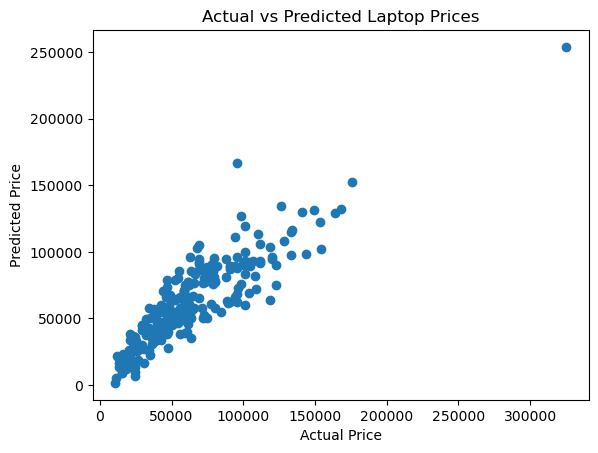

In [94]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()

# Feature Importances

In [97]:
feature_importance = pd.Series(LR.coef_, index=x.columns)
print(feature_importance.sort_values(ascending=False))

CpuSeries_M                60946.127498
CpuBrand_Intel Xeon        60946.127498
Brand_Razer                54119.801056
CpuSeries_HK               47508.944729
Resolution_2880x1800       26907.085318
                               ...     
No OS                     -14618.779286
CpuBrand_Intel Atom       -14914.491428
GpuCategory_Nvidia GTX    -21973.647390
CpuBrand_Samsung Cortex   -24628.823741
CpuBrand_AMD FX           -27724.339792
Length: 81, dtype: float64


In [100]:
features = x_train.columns
coefficients = LR.coef_

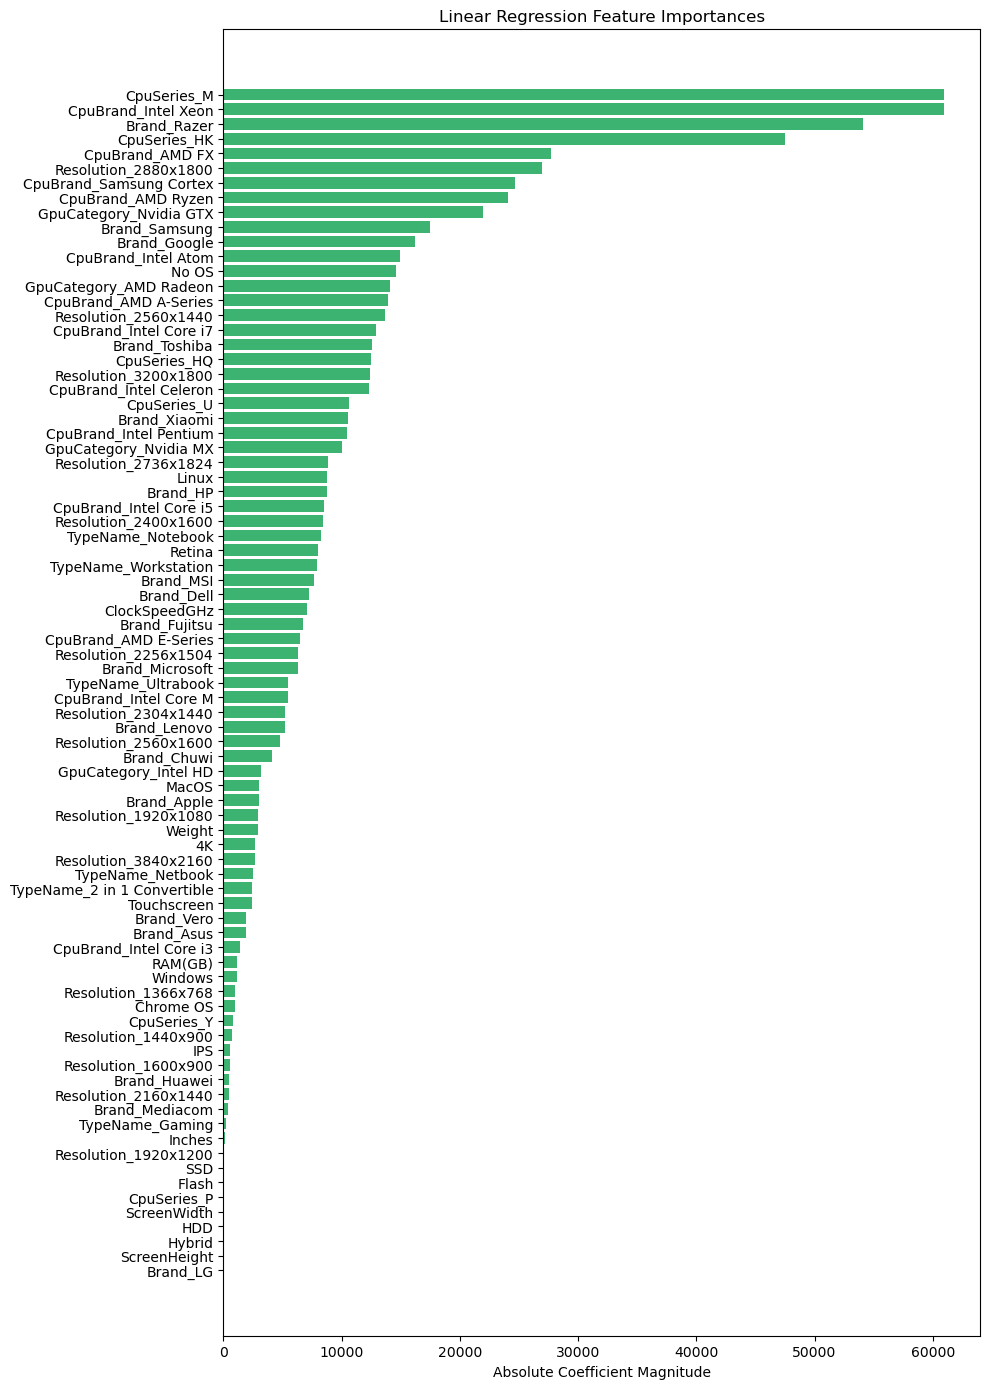

In [101]:
feat_imp_df = pd.DataFrame({'Feature': features,'Importance': np.abs(coefficients)})

feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,14))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='mediumseagreen')
plt.gca().invert_yaxis()
plt.title('Linear Regression Feature Importances')
plt.xlabel('Absolute Coefficient Magnitude')
plt.tight_layout()
plt.show()